In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import DBSCAN

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


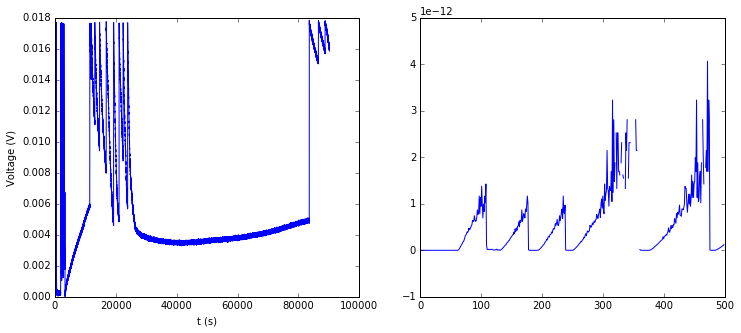

In [61]:
data=np.genfromtxt('./4ply.txt')
#parameter in equation
t=data[:,0]
Vol=data[:,1]
P=Vol*5714.4-0.7725
Pcore0=100.1038032
Pbag=1
A=0.01032256
L=0.00067392
miu=1.85e-5
Vcore=0.000786581
X=((Pcore0+Pbag)*(P-Pbag))/((Pcore0-Pbag)*(P+Pbag))
Kt= -np.log( ((Pcore0+Pbag)*(P-Pbag))/((Pcore0-Pbag)*(P+Pbag)) )*L*miu*Vcore/A/1000


#convolution kenal 
smooth_width =10
x1 = np.linspace(-3,3,smooth_width)
norm = np.sum(np.exp(-x1**2)) * (x1[1]-x1[0]) # ad hoc normalization
y1 = (4*x1**2 - 2) * np.exp(-x1**2) / smooth_width *8#norm*(x1[1]-x1[0])


#plot raw data
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(t,Vol)
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')

plt.subplot(122)
nmax=500
nmin=0
plt.plot(t[nmin:nmax],Kt[nmin:nmax])


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


(array([], dtype=int64),)
2.7176726560890094e-14
2.3819439514931613e-14
2.2812188891921152e-14
2.94060409855076e-14
2.3145665427612197e-14


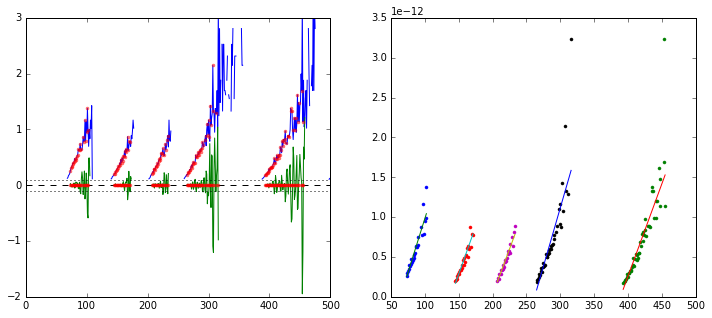

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(121)
# calculate second order deriv.
print np.where(Kt[nmin:nmax]*1.e12 <0.1)
Kt[nmin:nmax][np.where(Kt[nmin:nmax]*1.e12 <0.1)]=np.NaN
y_conv = np.convolve(Kt[nmin:nmax]*1.e12, y1, mode="same")


plt.plot(t[nmin:nmax],Kt[nmin:nmax]*1.e12)
plt.plot(t[nmin:nmax],y_conv)
plt.ylim(-2,3)


#how to cut the linear region
sigma=0.1

plt.plot([nmin,nmax],[sigma,sigma],'k:')
plt.plot([nmin,nmax],[0.,0.],'k--')
plt.plot([nmin,nmax],[-sigma,-sigma],'k:')


ind=np.where(y_conv < sigma,True,False)
plt.plot(t[nmin:nmax][ind],Kt[nmin:nmax][ind]*1.e12,'r.',alpha=0.5)
plt.plot(t[nmin:nmax][ind],Kt[nmin:nmax][ind],'r.',alpha=0.5)

plt.subplot(122)
x=t[nmin:nmax][ind]
y=Kt[nmin:nmax][ind]

db = DBSCAN(eps = 30,min_samples = 5).fit(np.vstack((x,y)).T)

bins=5
for i in range(bins):
    idx=np.where( db.labels_==i, True,False)
    slope, intercept, r_value, p_value, std_err  = stats.linregress(x[idx][0:-3],y[idx][0:-3])
    plt.plot(x[idx],y[idx],'.')
    plt.plot(t[nmin:nmax][ind][idx],t[nmin:nmax][ind][idx]*slope+intercept)
    print slope

In [25]:
#change parameter for different situations
#1) nmin and nmax to get the fitting range
#2) sigma clip value
#3) DBSCAN(eps = 30,min_samples = 5)  eps value and min_samples
#5) stats.linregress(x[idx][0:-3],y[idx][0:-3])   fitting region e.g., [0:-3]  to [0: -5]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less


1.3006565282979947e-15
7.816864105291596e-16
9.432569617425101e-16
6.256513027794462e-16
6.406851397769012e-16


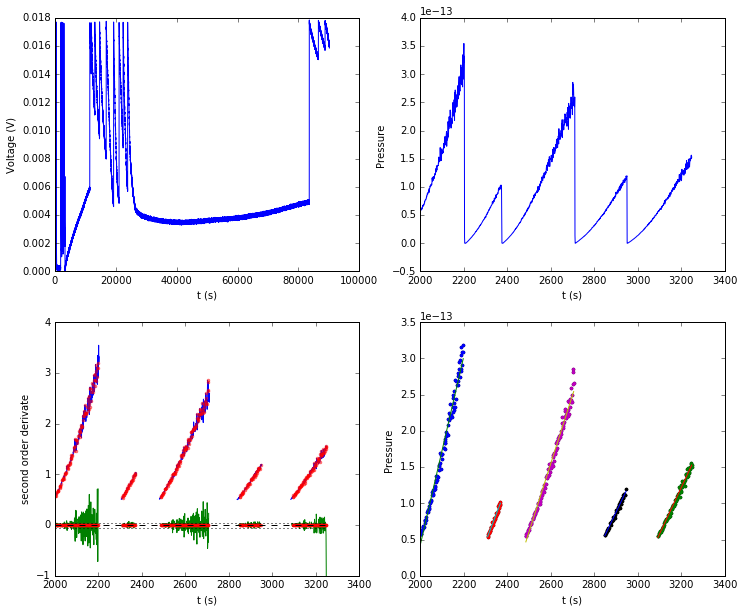

In [78]:
data=np.genfromtxt('./4ply.txt')
#parameter in equation
t=data[:,0]
Vol=data[:,1]
P=Vol*5714.4-0.7725
Pcore0=100.1038032
Pbag=1
A=0.01032256
L=0.00067392
miu=1.85e-5
Vcore=0.000786581
X=((Pcore0+Pbag)*(P-Pbag))/((Pcore0-Pbag)*(P+Pbag))
Kt= -np.log( ((Pcore0+Pbag)*(P-Pbag))/((Pcore0-Pbag)*(P+Pbag)) )*L*miu*Vcore/A/1000


#convolution kenal 
smooth_width =10
x1 = np.linspace(-3,3,smooth_width)
norm = np.sum(np.exp(-x1**2)) * (x1[1]-x1[0]) # ad hoc normalization
y1 = (4*x1**2 - 2) * np.exp(-x1**2) / smooth_width *8#norm*(x1[1]-x1[0])



#plot figure

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(t,Vol)
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')

plt.subplot(222)
nmax=3250
nmin=2000
plt.plot(t[nmin:nmax],Kt[nmin:nmax])
plt.xlabel('t (s)')
plt.ylabel('Pressure ')

plt.subplot(223)
# calculate second order deriv.

cut=0.5
Kt[nmin:nmax][np.where(Kt[nmin:nmax]*1.e13 <cut)]=np.NaN
y_conv = np.convolve(Kt[nmin:nmax]*1.e13, y1, mode="same")


plt.plot(t[nmin:nmax],Kt[nmin:nmax]*1.e13)
plt.plot(t[nmin:nmax],y_conv)
plt.ylim(-1,4)
plt.xlabel('t (s)')
plt.ylabel('second order derivate')


#how to cut the linear region
sigma=0.05
ind=np.where(y_conv*1.e13 < sigma,True,False)

plt.plot(t[nmin:nmax][ind],Kt[nmin:nmax][ind]*1.e13,'r.',alpha=0.5)
plt.plot(t[nmin:nmax][ind],Kt[nmin:nmax][ind],'r.',alpha=0.5)

plt.plot([nmin,nmax],[sigma,sigma],'k:')
plt.plot([nmin,nmax],[0.,0.],'k--')
plt.plot([nmin,nmax],[-sigma,-sigma],'k:')



plt.subplot(224)

plt.plot(t[nmin:nmax][ind],Kt[nmin:nmax][ind],'k.')

x=t[nmin:nmax][ind]
y=Kt[nmin:nmax][ind]

db = DBSCAN(eps = 30,min_samples = 5).fit(np.vstack((x,y)).T)

bins=np.unique(db.labels_).shape[0]
for i in range(bins):
    idx=np.where( db.labels_==i, True,False)
    slope, intercept, r_value, p_value, std_err  = stats.linregress(x[idx][0:-3],y[idx][0:-3])
    plt.plot(x[idx],y[idx],'.')
    plt.plot(t[nmin:nmax][ind][idx],t[nmin:nmax][ind][idx]*slope+intercept)
    print slope
plt.xlabel('t (s)')
plt.ylabel('Pressure ')
